<a href="https://colab.research.google.com/github/Jiehuang1102/coding-two-advanced-frameworks/blob/patch-1/Jie_Huang_Week1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Museum_visitors

I used the museum data in the sample for data visualization exercises.



To fully present the data in the museum_visitors.csv file, I chose four different data visualization schemes: time series analysis, cumulative visitor comparison, monthly visitor comparison, and annual growth rate.

In [ ]:
import pandas as pd

# 使用复制的文件路径
file_path = '/museum_visitors.csv'

# 读取 CSV 文件
data = pd.read_csv(file_path)

# 显示数据的前几行
print(data.head())


         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


一、Time series analysis

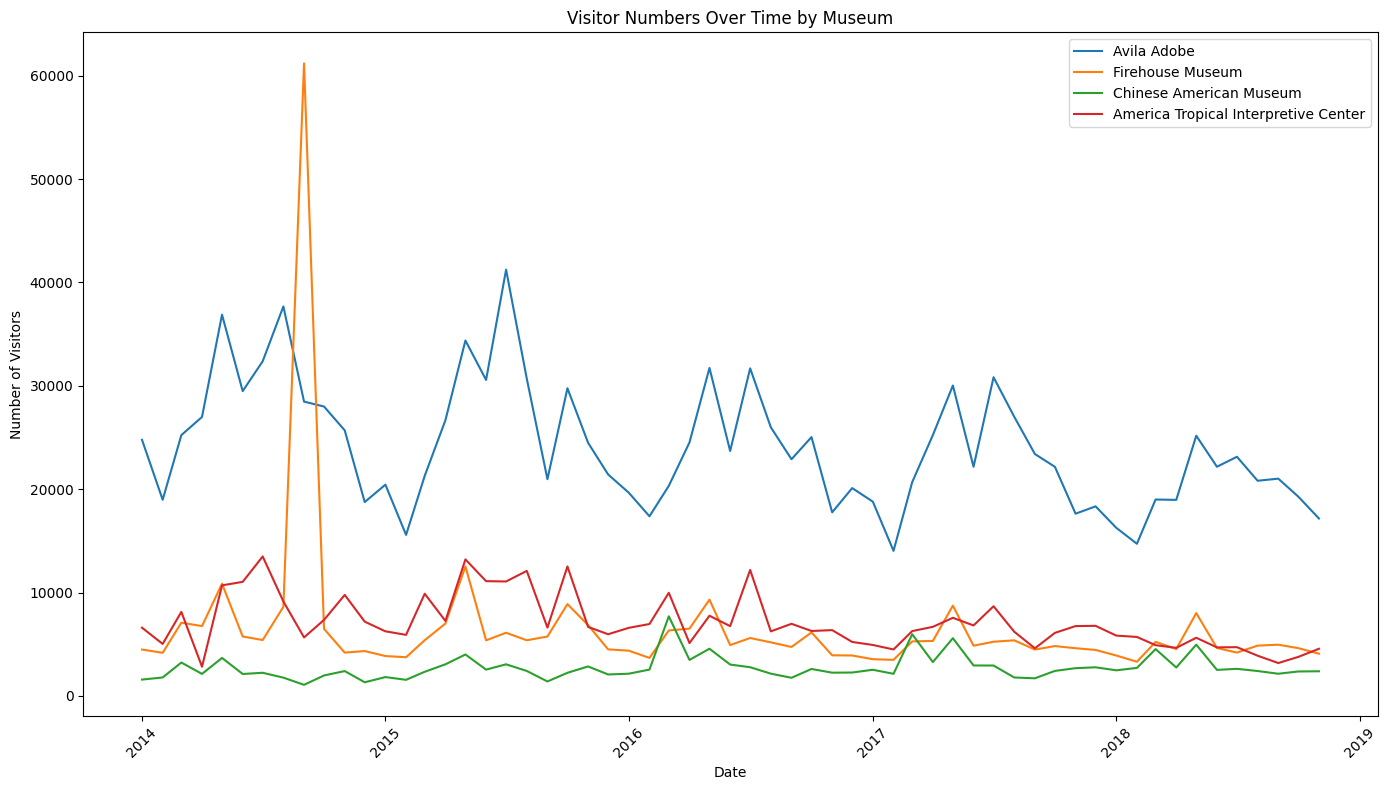

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据加载
file_path = '/museum_visitors.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# 绘制时间序列折线图
plt.figure(figsize=(14, 8))
for column in data.columns[1:]:
    sns.lineplot(data=data, x='Date', y=column, label=column)
plt.title('Visitor Numbers Over Time by Museum')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualisation of the first scenario shows a line chart of the number of visitors to each museum over time. From the graph, we can observe trends and seasonal fluctuations in the number of visitors to various museums.

二、Cumulative visitor comparison

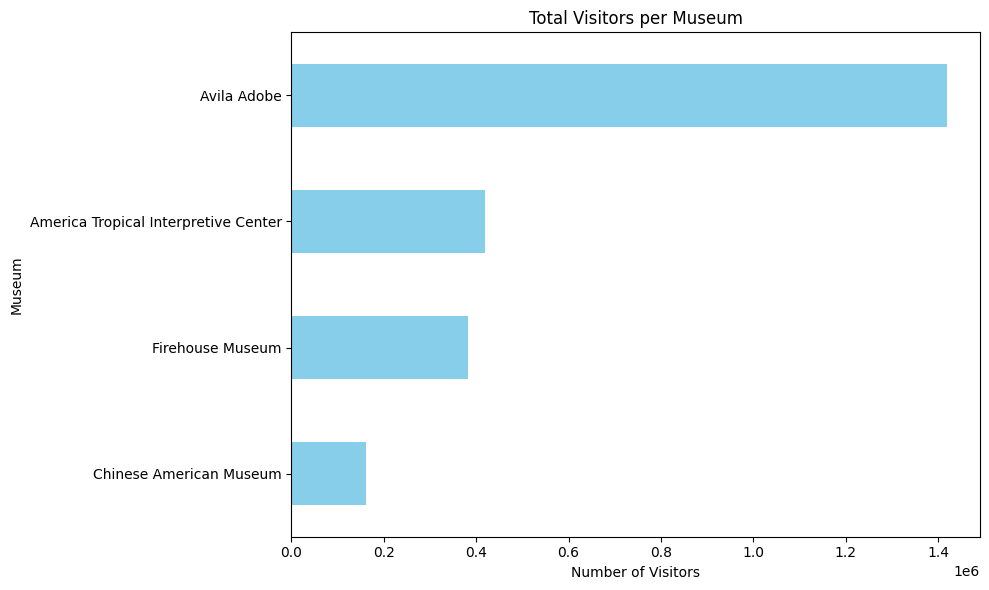

In [ ]:
# 计算每个博物馆的总访客数
total_visitors = data.iloc[:, 1:].sum().sort_values()

# 绘制柱状图
plt.figure(figsize=(10, 6))
total_visitors.plot(kind='barh', color='skyblue')
plt.title('Total Visitors per Museum')
plt.xlabel('Number of Visitors')
plt.ylabel('Museum')
plt.tight_layout()
plt.show()


The visualization result of the second scenario shows a bar chart of the total number of visitors to all museums in the file over the entire time period. As can be seen from the graph, Avila Adobe has far more visitors than other museums, while the Chinese American Museum has the fewest visitors.

三、Monthly visitor comparison

<ipython-input-13-935f309142d3>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  selected_months.groupby(selected_months['Date'].dt.strftime('%Y-%m')).sum().plot(kind='bar', stacked=True)


<Figure size 1400x800 with 0 Axes>

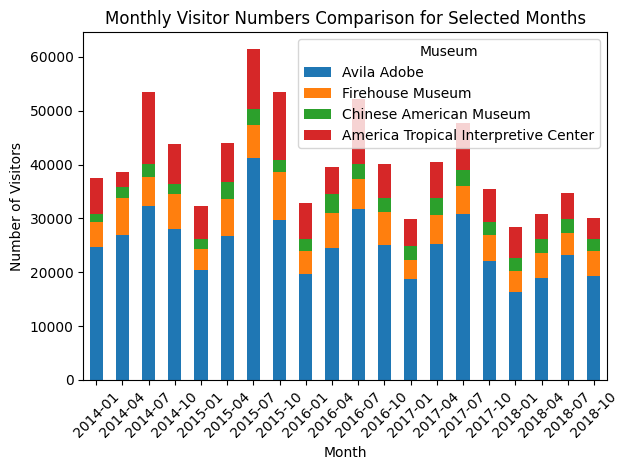

In [ ]:
# 选择特定月份进行比较
selected_months = data[data['Date'].dt.month.isin([1, 4, 7, 10])]

# 绘制堆叠柱状图
plt.figure(figsize=(14, 8))
selected_months.groupby(selected_months['Date'].dt.strftime('%Y-%m')).sum().plot(kind='bar', stacked=True)
plt.title('Monthly Visitor Numbers Comparison for Selected Months')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Museum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualisation of the third scenario shows the number of visitors to different museums in selected months (January, April, July and October of each year) in a stacked bar chart. Such displays help us visualize the popularity of each museum and how it changes from season to season.

四、Annual growth rate

<ipython-input-14-2e9308fdb0db>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_visitors = data.groupby(data['Date'].dt.year).sum()


<Figure size 1400x800 with 0 Axes>

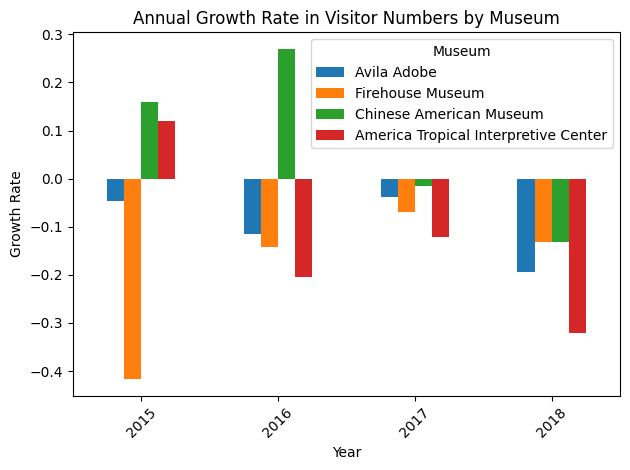

In [ ]:
# 计算年度总访客数
yearly_visitors = data.groupby(data['Date'].dt.year).sum()

# 计算年度增长率
yearly_growth_rate = yearly_visitors.pct_change().dropna()

# 绘制年度增长率图
plt.figure(figsize=(14, 8))
yearly_growth_rate.plot(kind='bar')
plt.title('Annual Growth Rate in Visitor Numbers by Museum')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend(title='Museum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualisation of the fourth scenario shows a bar chart of the growth rate of visitor numbers for each museum year. This chart helps us understand which museums are gaining traction and which may be losing it. From the graph, we can observe the growth rate of the number of visitors to each museum in different years, with some years showing a significant increase or decrease.